In [1]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Importing required modules
import numpy as np
import matplotlib.pyplot as plt

#Defining the banded function from Newman (2013)
def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

#Defining the 1D DST Type-I function from Newman (2013)
def dst(y):
    N = len(y)
    y2 = np.empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -np.imag(np.fft.rfft(y2))[:N]
    a[0] = 0.0

    return a

#Defining the 1D inverse DST Type-I function from Newman (2013)
def idst(a):
    N = len(a)
    c = np.empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = np.fft.irfft(c)[:N]
    y[0] = 0.0

    return y

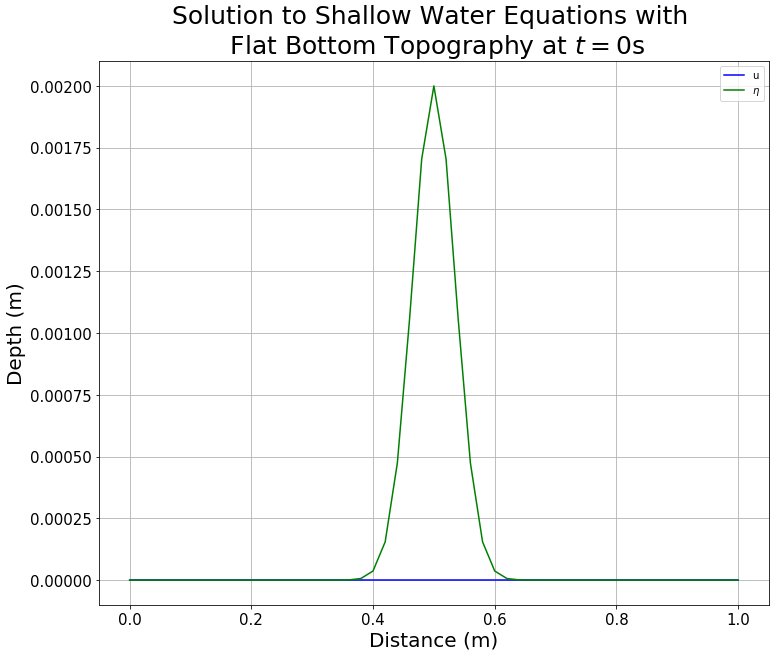

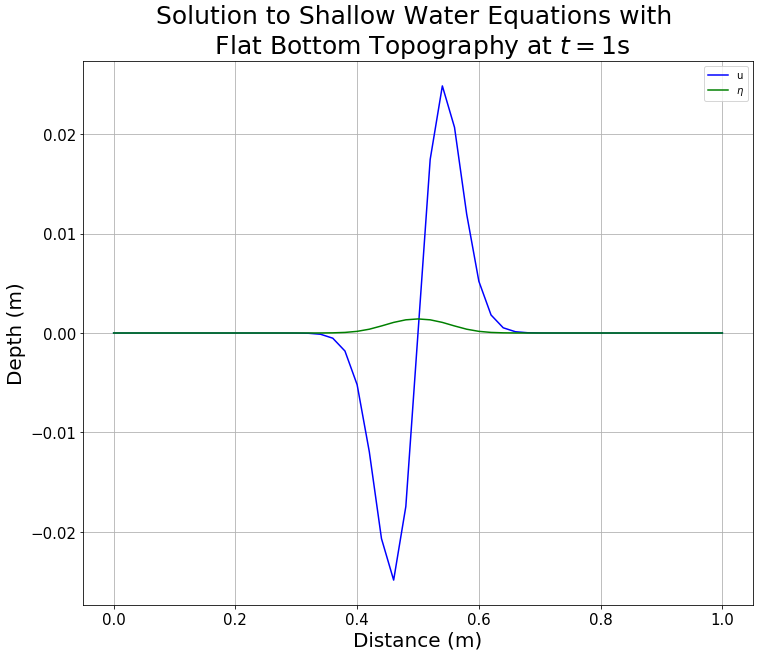

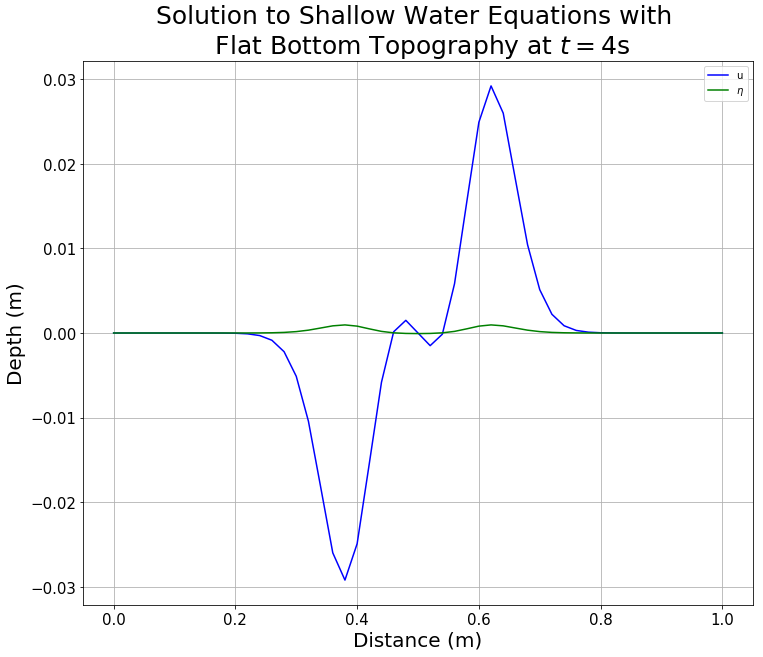

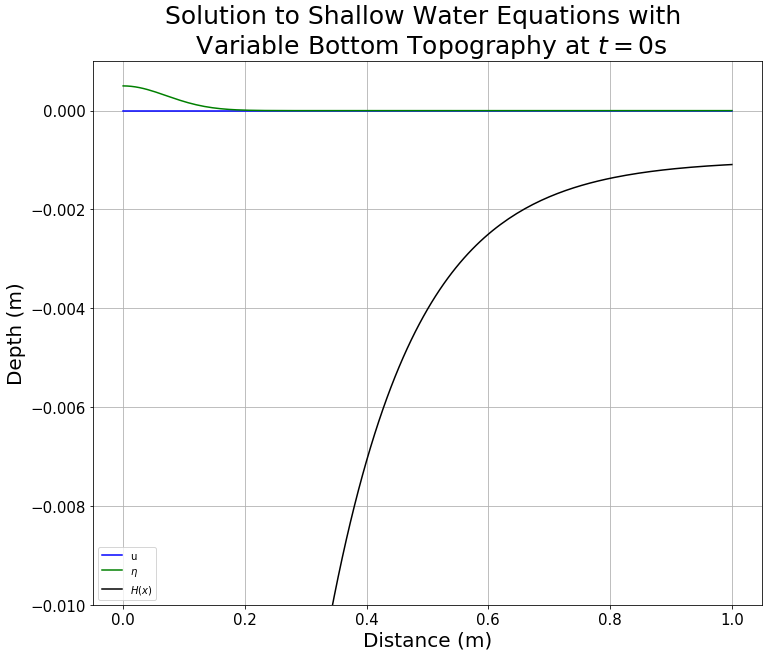

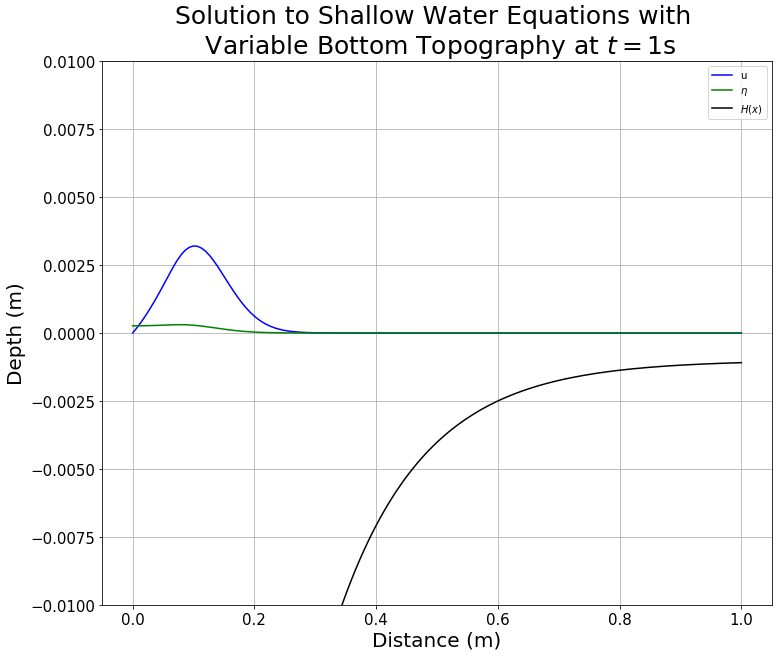

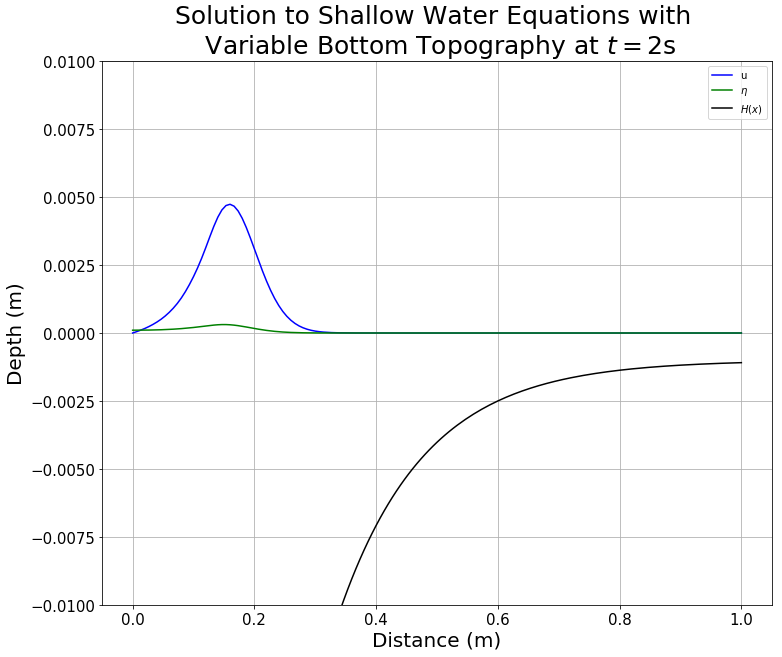

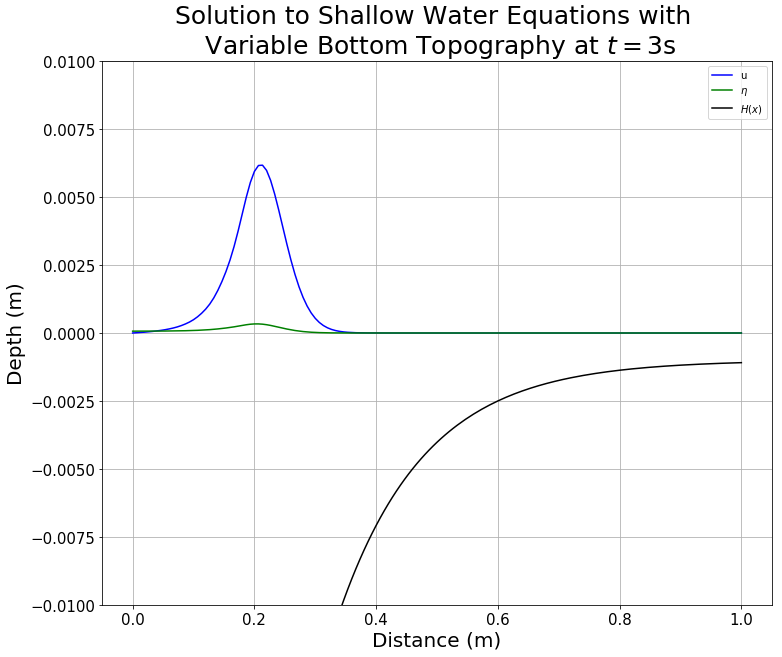

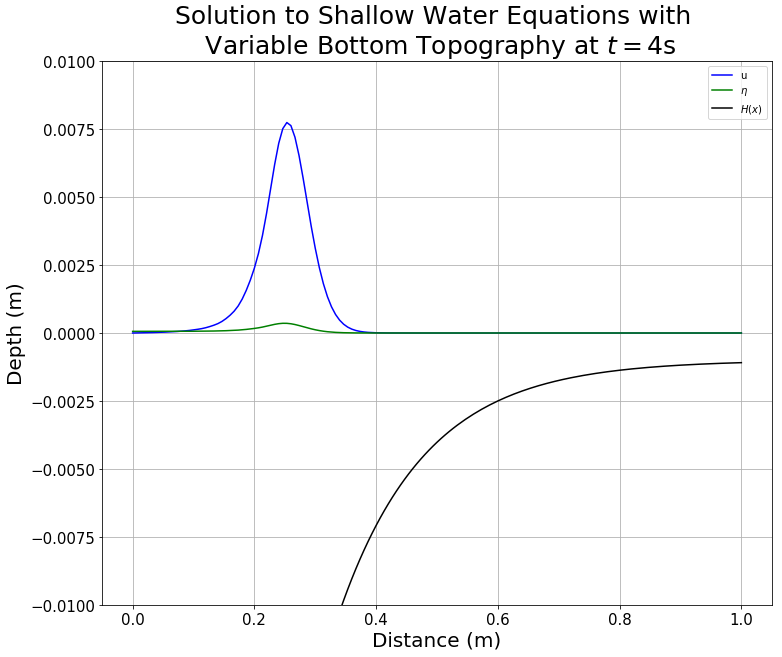

In [2]:
#PROBLEM 1

#PART B
#Define a function for the flux 
def F(u, eta, H):
    Fu = 0.5*u**2 + g*eta
    Feta = (H + eta)*u
    return np.array([Fu, Feta], float)

#Defining constants
dx = 0.02
dt = 0.001
g = 9.81
H = 0.01
x = 50 #Size of grid

#Initializing arrays 
t = np.arange(0, 4.01, dt)
u = np.zeros((len(t)+1, x+1), float)
eta = np.zeros((len(t)+1, x+1), float) 

#Defining boundary conditions
x0 = 0
x1 = 0

#Defining initial conditions
t0 = 0
A = 0.002
mu = 0.5
sigma = 0.05
x_array = np.arange(0,1+dx,dx)
u[0,:] = t0
eta[0,:] = A*np.exp(-((x_array - mu)**2)/(sigma**2))

#Initialize half-step arrays
u_half = np.zeros((x), float)
eta_half = np.zeros((x), float)

#Solve shallow water equations using Lax-Wendroff method
for i in range(0,len(t)):
    flux = F(u[i], eta[i], H)
    for j in range(0,x):
        #Half-steps of u and eta
        u_half[j] = 0.5*(u[i,j+1] + u[i,j]) - ((dt/(2*dx))*(flux[0,j+1] - flux[0,j]))
        eta_half[j] = 0.5*(eta[i,j+1] + eta[i,j]) - ((dt/(2*dx))*(flux[1,j+1] - flux[1,j]))

    #Boundary conditions
    eta[i+1,0] = -((dt/dx)*(flux[1,1] - flux[1,0])) + eta[i,0] 
    eta[i+1,x] = -((dt/dx)*(flux[1,x] - flux[1,x-1])) + eta[i,x]  
    u[i+1,0] = x0
    u[i+1,x] = x1
       
    #Half-steps of F 
    F_half = F(u_half, eta_half, H)

    #Full time-steps of u and eta
    for j in range(1,x):
        u[i+1, j] = u[i,j] - (dt/dx)*(F_half[0,j] - F_half[0,j-1])
        eta[i+1, j] = eta[i,j] - (dt/dx)*(F_half[1,j] - F_half[1,j-1])  
        
#Plot solutions
plt.figure(figsize=(12,10))
plt.plot(x_array, u[0], label='u', color='b')
plt.plot(x_array,eta[0], label='$\eta$', color='g')
plt.title('Solution to Shallow Water Equations with \n Flat Bottom Topography at $t = 0$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot1.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(x_array, u[100], label='u', color='b')
plt.plot(x_array,eta[100], label='$\eta$', color='g')
plt.title('Solution to Shallow Water Equations with \n Flat Bottom Topography at $t = 1$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot2.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(x_array, u[400], label='u', color='b')
plt.plot(x_array,eta[400], label='$\eta$', color='g')
plt.title('Solution to Shallow Water Equations with \n Flat Bottom Topography at $t = 4$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot3.pdf', bbox_inches='tight')
plt.show()

#PART C
#Constants
dx_c = 1/150
dt_c = 0.001
x_c = 150 #Size of grid

#Initialize arrays
t_c = np.arange(0, 4.01, dt)
u_c = np.zeros((len(t_c)+1, x_c+1), float)
eta_c = np.zeros((len(t_c)+1, x_c+1), float) 

#Boundary conditions
x0_c = 0
x1_c = 0

#Initial conditions
t0_c = 0
A_c = 0.0005
mu_c = 0
sigma_c = 0.1
xc_array = np.arange(0,1+dx_c,dx_c)
u_c[0,:] = t0_c
eta_c[0,:] = A_c*np.exp(-((xc_array - mu_c)**2)/(sigma_c**2))

#Bottom topography
H_c = 0.001 + 0.1*np.exp(-7*xc_array)
H_half = np.zeros((x_c), float)

#Initialize half-step arrays
u_half_c = np.zeros((x_c), float)
eta_half_c = np.zeros((x_c), float)        

#Solve shallow water equations using Lax-Wendroff method
for i in range(0, len(t_c)):
    for j in range(0,x_c):
        flux_c = F(u_c[i], eta_c[i], H_c)
        
        #Half-steps
        u_half_c[j] = (0.5*(u_c[i,j+1] + u_c[i,j])) - ((dt_c/(2*dx_c))*(flux_c[0,j+1] - flux_c[0,j]))
        eta_half_c[j] = (0.5*(eta_c[i,j+1] + eta_c[i,j])) - ((dt_c/(2*dx_c))*(flux_c[1,j+1] - flux_c[1,j]))
        H_half[j] = 0.5*(H_c[j+1] + H_c[j])
            
    #Boundary conditions
    eta_c[i+1,0] = -((dt_c/dx_c)*(flux_c[1,1] - flux_c[1,0])) + eta_c[i,0] 
    eta_c[i+1,x_c] = -((dt_c/dx_c)*(flux_c[1,x_c] - flux_c[1,x_c-1])) + eta_c[i,x_c]  
    u_c[i+1,0] = x0_c
    u_c[i+1,x] = x1_c  
     
    #Half-steps of flux
    F_half_c = F(u_half_c, eta_half_c, H_half)
    
    #Full steps of u and eta
    for j in range(1, x_c):
        u_c[i+1, j] = u_c[i,j] - ((dt_c/dx_c)*(F_half_c[0,j] - F_half_c[0,j-1]))
        eta_c[i+1, j] = eta_c[i,j] - ((dt_c/dx_c)*(F_half_c[1,j] - F_half_c[1,j-1])) 
        
#Plot solutions
plt.figure(figsize=(12,10))
plt.plot(xc_array, u_c[0], label='u', color='b')
plt.plot(xc_array, eta_c[0], label='$\eta$', color='g')
plt.plot(xc_array,-1*H_c, label='$H(x)$', color='k')
plt.title('Solution to Shallow Water Equations with \n Variable Bottom Topography at $t = 0$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 0.001)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot4.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(xc_array, u_c[100], label='u', color='b')
plt.plot(xc_array, eta_c[100], label='$\eta$', color='g')
plt.plot(xc_array,-1*H_c, label='$H(x)$', color='k')
plt.title('Solution to Shallow Water Equations with \n Variable Bottom Topography at $t = 1$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 0.01)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot5.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(xc_array, u_c[200], label='u', color='b')
plt.plot(xc_array, eta_c[200], label='$\eta$', color='g')
plt.plot(xc_array,-1*H_c, label='$H(x)$', color='k')
plt.title('Solution to Shallow Water Equations with \n Variable Bottom Topography at $t = 2$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 0.01)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot6.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(xc_array, u_c[300], label='u', color='b')
plt.plot(xc_array,eta_c[300], label='$\eta$', color='g')
plt.plot(xc_array,-1*H_c, label='$H(x)$', color='k')
plt.title('Solution to Shallow Water Equations with \n Variable Bottom Topography at $t = 3$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 0.01)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot7.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(xc_array, u_c[400], label='u', color='b')
plt.plot(xc_array,eta_c[400], label='$\eta$', color='g')
plt.plot(xc_array,-1*H_c, label='$H(x)$', color='k')
plt.title('Solution to Shallow Water Equations with \n Variable Bottom Topography at $t = 4$s', fontsize=25)
plt.xlabel('Distance (m)', fontsize=20)
plt.ylabel('Depth (m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(-0.01, 0.01)
plt.legend()
plt.grid()
plt.savefig('lab9_q1_plot8.pdf', bbox_inches='tight')
plt.show()

-------------------------------------------- FTCS METHOD PLOTS --------------------------------------------


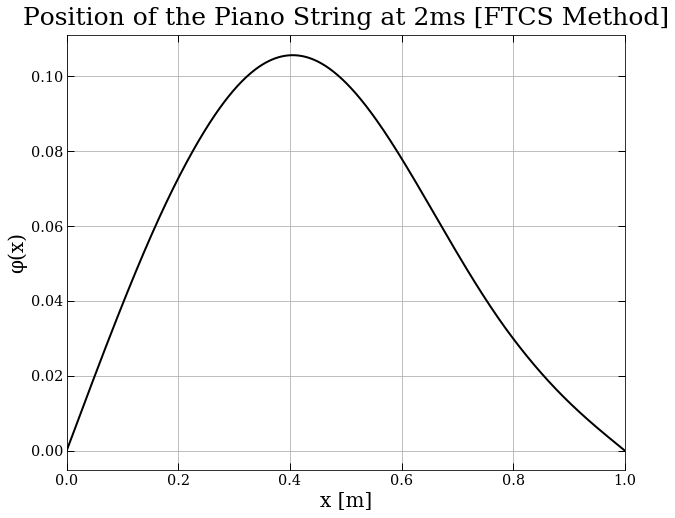

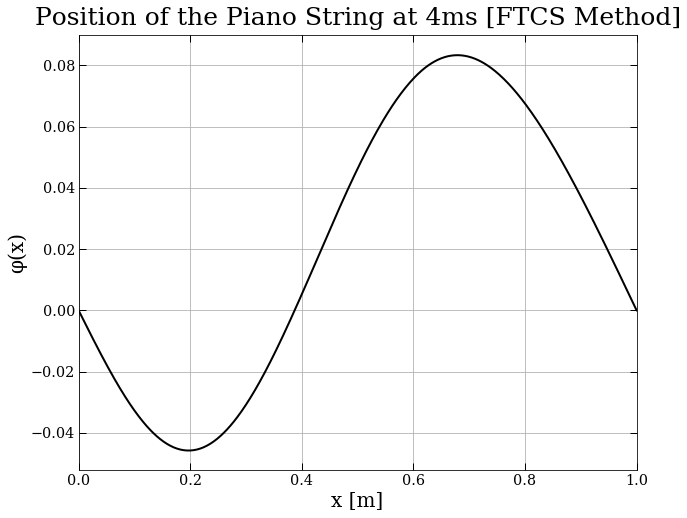

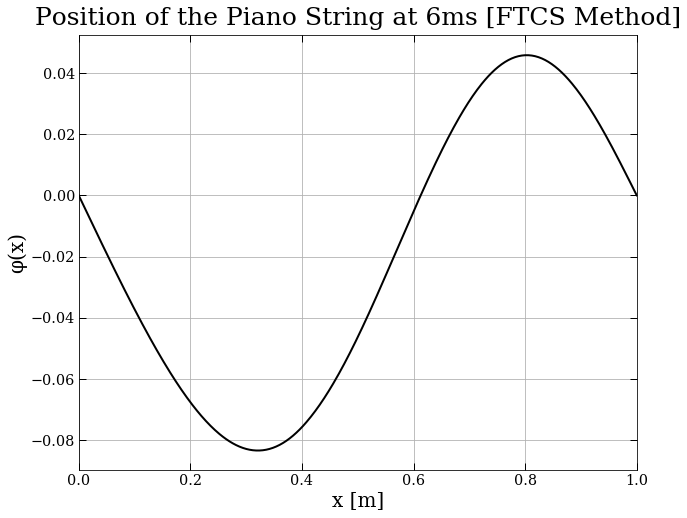

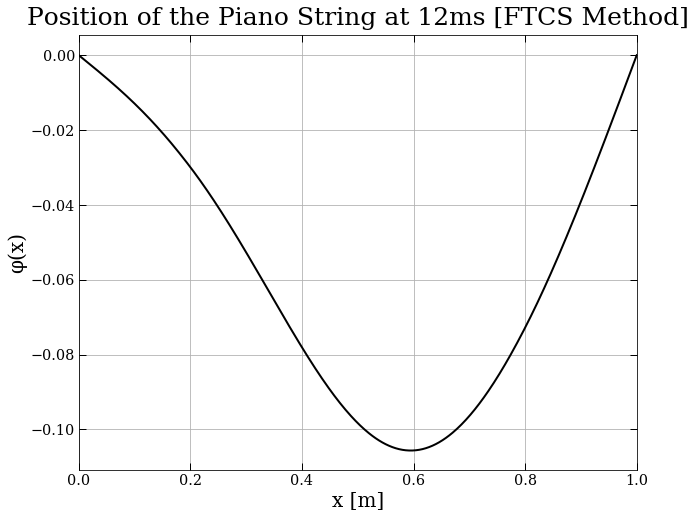

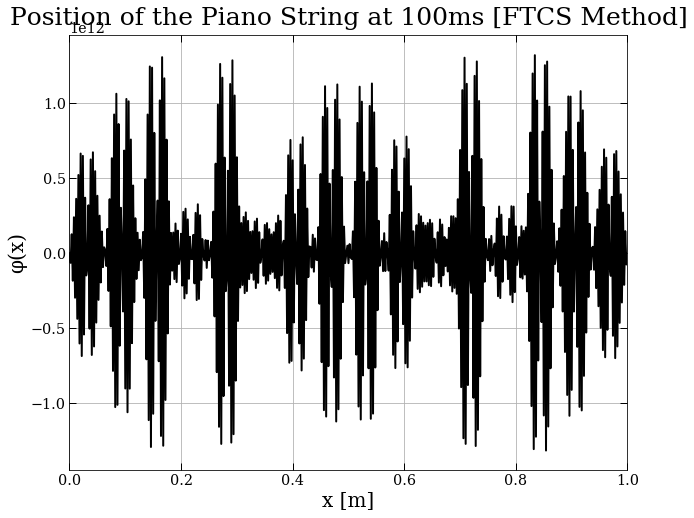


-------------------------------------------- CRANK-NICOLSON PLOTS --------------------------------------------


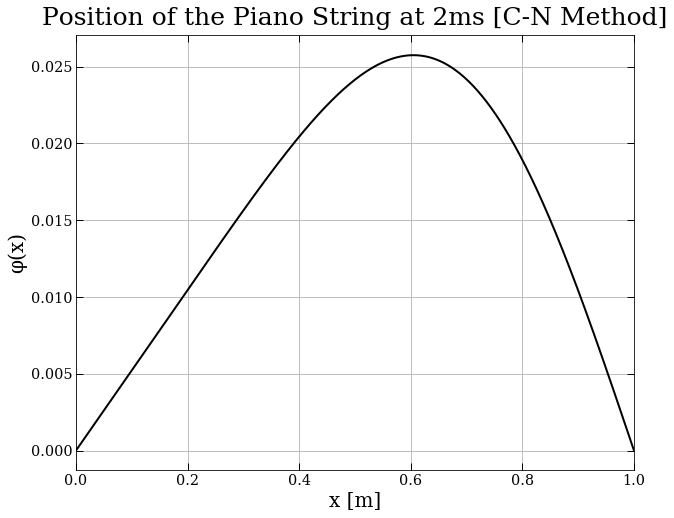

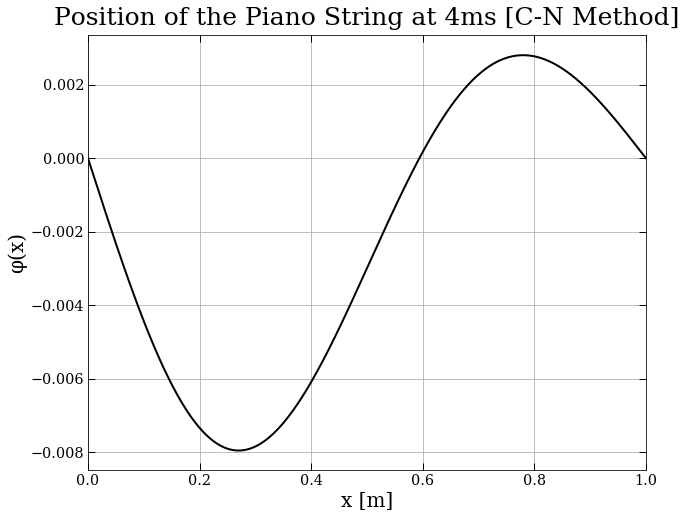

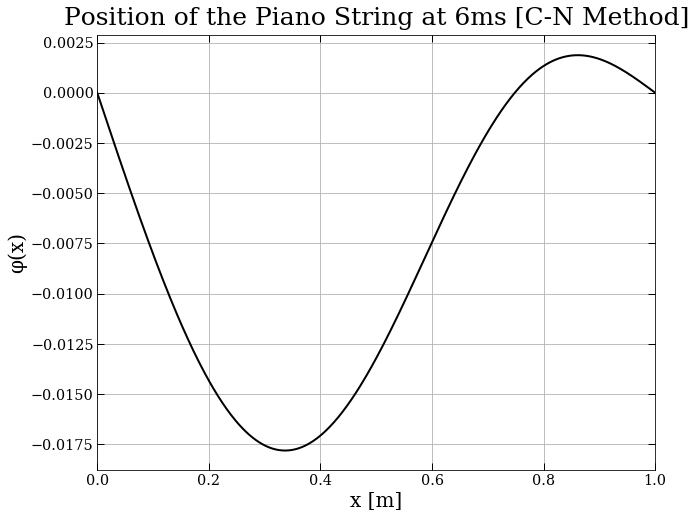

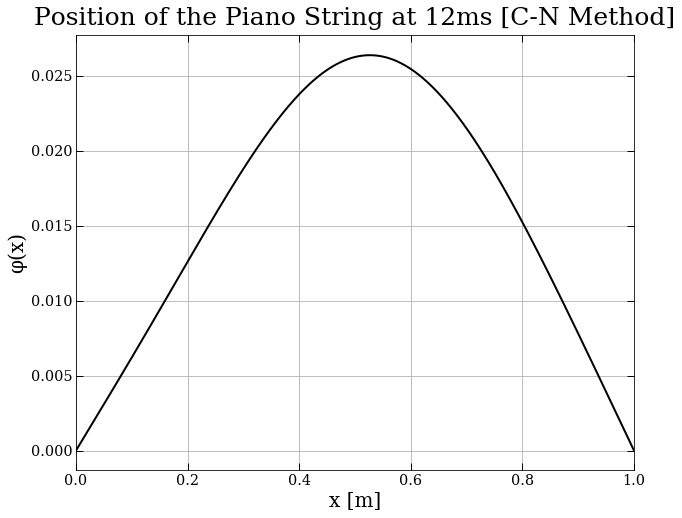

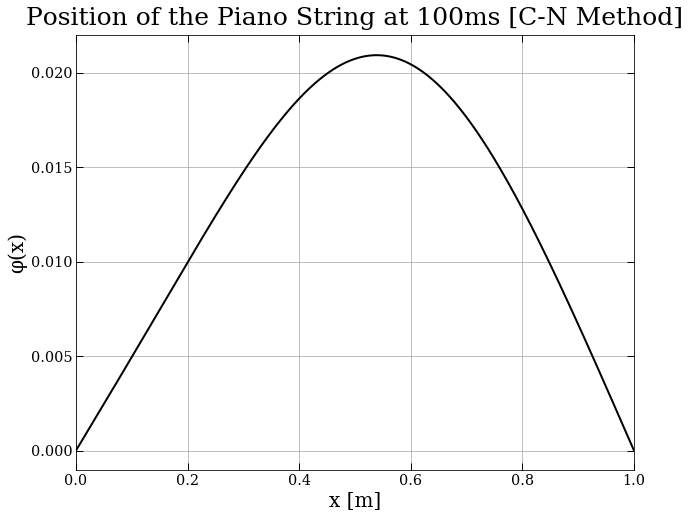


-------------------------------------------- SPECTRAL METHOD PLOTS --------------------------------------------


c:\users\ayush\anaconda3\lib\site-packages\ipykernel_launcher.py:248: RuntimeWarning: invalid value encountered in true_divide


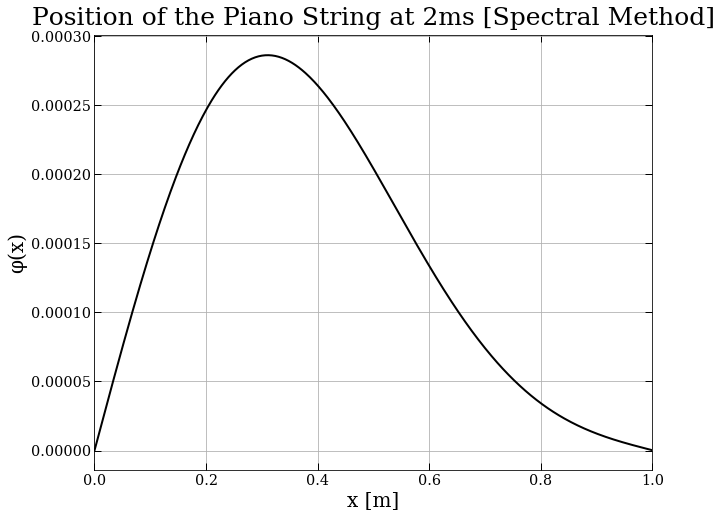

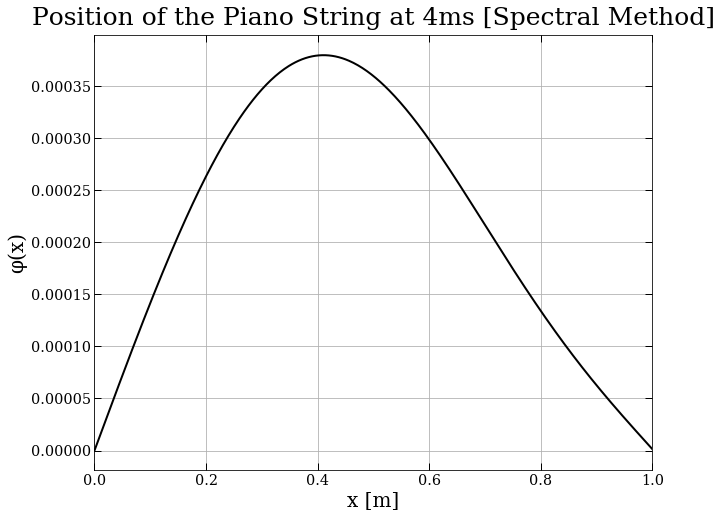

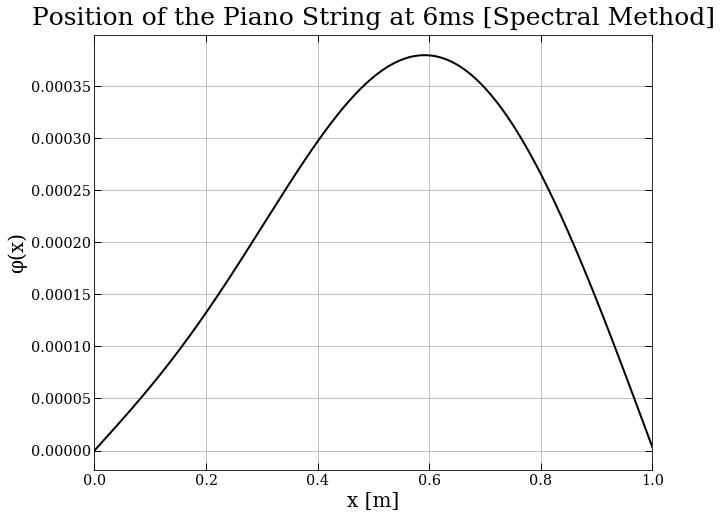

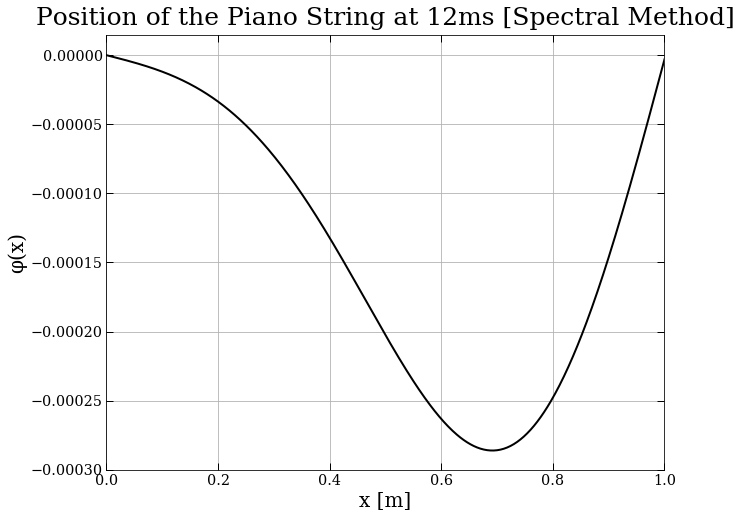

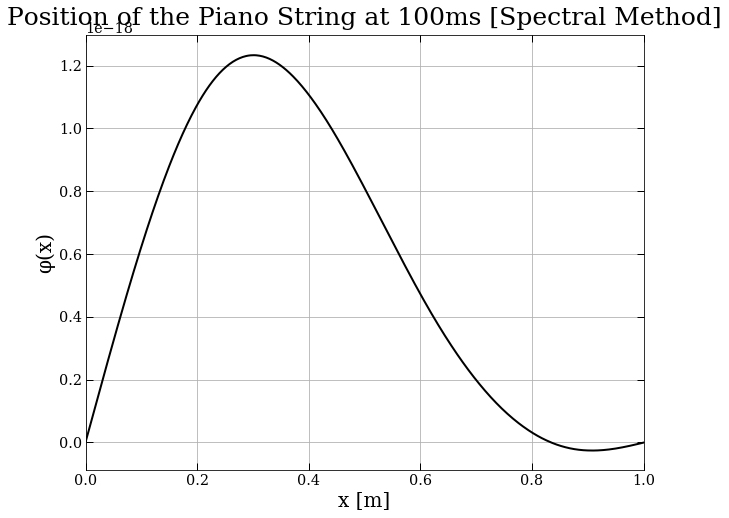

In [3]:
#PROBLEM 2

#PART A
#Printing to segment plots
print('-------------------------------------------- FTCS METHOD PLOTS --------------------------------------------')

#Defining constants
L = 1       #[m]
d = 0.1     #[m]
sigma = 0.3 #[m]
C = 1       #[m/s]
v = 100     #[m/s]

#Defining constants for FTCS method
N = 500     #grid divisions
a = L/N     #grid spacing
h = 1e-7    #time-step

#Setting initial condition that phi is 0 everywhere
phi = np.zeros(N+1,float)

#Defining an array for 0 < x < L and evaluating psi at all x
x = x = np.linspace(0,L,N+1)
psi = C*x*(L-x)/L**2*np.exp(-(x-d)**2/2/sigma**2)

#Defining a function to run the FTCS method
def FTCS(psi, phi, ti, tf):
    t = ti
    
    #While loop to compute new values of psi and phi
    while t<tf:
        phi_temp = np.copy(phi)
        phi[1:N] += h*psi[1:N]
        psi[1:N] += h*v**2/a**2*(phi_temp[2:N+1] + phi_temp[0:N-1] - 2*phi_temp[1:N])
        t += h
        
        #If statements to make plots at desired intervals for part B
        if (np.abs(t) - 2e-3) < 1e-7 and (np.abs(t)-2e-3) > 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 2ms [FTCS Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot1.pdf', bbox_inches='tight')
            plt.show()
    
        elif (np.abs(t) - 4e-3) < 1e-7 and (np.abs(t)-4e-3) > 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 4ms [FTCS Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot2.pdf', bbox_inches='tight')
            plt.show()
        
        elif (np.abs(t) - 6e-3) < 1e-7 and (np.abs(t)-6e-3) > 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 6ms [FTCS Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot3.pdf', bbox_inches='tight')
            plt.show()
        
        elif (np.abs(t) - 12e-3) < 1e-7 and (np.abs(t)-12e-3) > 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 12ms [FTCS Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot4.pdf', bbox_inches='tight')
            plt.show()
    
        elif (np.abs(t) - 100e-3) < 1e-7 and (np.abs(t)-100e-3) > 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 100ms [FTCS Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot5.pdf', bbox_inches='tight')
            plt.show()

    return phi,psi

#PART B
#Defining plot rc parameters for font and ticks
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')

#Applying the function (the desired interval plots are embedded in the function)
phi, psi = FTCS(phi, psi, 0, 100e-3)

#PART C
#Printing to segment plots
print()
print('-------------------------------------------- CRANK-NICOLSON PLOTS --------------------------------------------')

#Setting initial condition that phi is 0 everywhere
phi = np.zeros(N+1,float)

#Defining an array for 0 < x < L and evaluating psi at all x
x = x = np.linspace(0,L,N+1)
psi = C*x*(L-x)/L**2*np.exp(-(x-d)**2/2/sigma**2)

#Defining a and b parameters for the C-N method
h2 = 1e-4              #new time-step
a1 = 1 + h2*v**2/a**2
a2 = -0.5*h2*v**2/a**2
b1 = 1 - h2*v**2/a**2
b2 = 0.5*h2*v**2/a**2

#Setting up an empty array for A and filling it with a1 and a2
A = np.empty((3,N))
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

#Defining a function to apply the C-N method with the banded function
def CN(psi, phi, ti, tf):
    t = ti
    
    #While loop to compute new values of psi and phi
    while t<tf:
        psi_temp = np.copy(psi)
        phi_temp = np.copy(phi)
        
        varray = b1*phi[1:N] + b2*(phi[2:N+1] + phi[0:N-1]) + psi_temp[1:N]
        phi[1:N] = banded(A,varray,1,1)
        psi[1:N] += (h2*v**2/a**2)*(phi_temp[2:N+1] + phi_temp[0:N-1] - 2*phi_temp[1:N]) + (h2*v**2/a**2)*(phi[2:N+1] + phi[0:N-1] - 2*phi[1:N])
                
        t+=h2
        
        #If statements to make plots at desired intervals for part B
        if (np.abs(t) - 2e-3) < 1e-4 and (np.abs(t)-2e-3) >= 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 2ms [C-N Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot6.pdf', bbox_inches='tight')
            plt.show()
    
        elif (np.abs(t) - 4e-3) < 1e-4 and (np.abs(t)-4e-3) >= 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 4ms [C-N Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot7.pdf', bbox_inches='tight')
            plt.show()
        
        elif (np.abs(t) - 6e-3) < 1e-4 and (np.abs(t)-6e-3) >= 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 6ms [C-N Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot8.pdf', bbox_inches='tight')
            plt.show()
        
        elif (np.abs(t) - 12e-3) < 1e-4 and (np.abs(t)-12e-3) >= 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 12ms [C-N Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot9.pdf', bbox_inches='tight')
            plt.show()
    
        elif (np.abs(t) - 100e-3) < 1e-4 and (np.abs(t)-100e-3) >= 0:
            plt.figure(figsize=(10,8))
            plt.title('Position of the Piano String at 100ms [C-N Method]', fontsize=25, y=1.01)
            plt.xlabel('x [m]', fontsize=20)
            plt.ylabel('φ(x)', fontsize=20)
            plt.xlim(0, 1)
            plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
            plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
            plt.plot(x, phi, color='black', linestyle='-', linewidth=2)
            plt.grid()
            plt.savefig('lab9_q2_plot10.pdf', bbox_inches='tight')
            plt.show()

    return phi,psi

#Applying the function
phi2, psi2 = CN(psi, phi, 0, 100e-3)

#PART F
#Printing to segment plots
print()
print('-------------------------------------------- SPECTRAL METHOD PLOTS --------------------------------------------')

#Setting initial condition that phi is 0 everywhere
phi = np.zeros(N+1,float)

#Defining an array for 0 < x < L and evaluating psi at all x
x = x = np.linspace(0,L,N+1)
psi = C*x*(L-x)/L**2*np.exp(-(x-d)**2/2/sigma**2)

#Defining k and omega_k from part d
k = np.arange(0,N+1)
wk = np.pi*v*k/L

#Defining a function for the spectral method
def spectral(psi, phi, t):
    #Applying the dst function
    b0_psi = dst(psi)
    b0_phi = dst(phi)
    
    #Defining the terms in the Fourier Series
    b1_psi = b0_psi*np.sin(wk*t)/wk
    b1_phi = b0_phi*np.cos(wk*t)
    
    #Returning phi by applying the idst function
    phi = idst(b1_psi + b1_phi)

    return phi

#Applying the spectral method at desired times
phi_2ms = spectral(psi, phi, 2e-3)
phi_4ms = spectral(psi, phi, 4e-3)
phi_6ms = spectral(psi, phi, 6e-3)
phi_12ms = spectral(psi, phi, 12e-3)
phi_100ms = spectral(psi, phi, 100e-3)

#Plotting phi at 2ms
plt.figure(figsize=(10,8))
plt.title('Position of the Piano String at 2ms [Spectral Method]', fontsize=25, y=1.01)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('φ(x)', fontsize=20)
plt.xlim(0, 1)
plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.plot(x, phi_2ms, color='black', linestyle='-', linewidth=2)
plt.grid()
plt.savefig('lab9_q2_plot11.pdf', bbox_inches='tight')
plt.show()

#Plotting phi at 4ms
plt.figure(figsize=(10,8))
plt.title('Position of the Piano String at 4ms [Spectral Method]', fontsize=25, y=1.01)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('φ(x)', fontsize=20)
plt.xlim(0, 1)
plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.plot(x, phi_4ms, color='black', linestyle='-', linewidth=2)
plt.grid()
plt.savefig('lab9_q2_plot12.pdf', bbox_inches='tight')
plt.show()

#Plotting phi at 6ms
plt.figure(figsize=(10,8))
plt.title('Position of the Piano String at 6ms [Spectral Method]', fontsize=25, y=1.01)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('φ(x)', fontsize=20)
plt.xlim(0, 1)
plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.plot(x, phi_6ms, color='black', linestyle='-', linewidth=2)
plt.grid()
plt.savefig('lab9_q2_plot13.pdf', bbox_inches='tight')
plt.show()

#Plotting phi at 12ms
plt.figure(figsize=(10,8))
plt.title('Position of the Piano String at 12ms [Spectral Method]', fontsize=25, y=1.01)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('φ(x)', fontsize=20)
plt.xlim(0, 1)
plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.plot(x, phi_12ms, color='black', linestyle='-', linewidth=2)
plt.grid()
plt.savefig('lab9_q2_plot14.pdf', bbox_inches='tight')
plt.show()

#Plotting phi at 100ms
plt.figure(figsize=(10,8))
plt.title('Position of the Piano String at 100ms [Spectral Method]', fontsize=25, y=1.01)
plt.xlabel('x [m]', fontsize=20)
plt.ylabel('φ(x)', fontsize=20)
plt.xlim(0, 1)
plt.tick_params(bottom=True, top=True, left=True, right=True, width=1, length=7, direction='in')
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
plt.plot(x, phi_100ms, color='black', linestyle='-', linewidth=2)
plt.grid()
plt.savefig('lab9_q2_plot15.pdf', bbox_inches='tight')
plt.show()